# Python Linear Algebra Part 3: Matrix Application: PCA & Linear Regression
## Full Day Workshop for user learn Data Science with Python
## 2018 Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose

# Probability: Correlation & Covarience
## Covariance and Correlation
- In probability, covariance is the measure of the joint probability for two random variables. 
- It
describes how the two variables change together. It is denoted as the function cov(X; Y ),

## Covariance
- Covariance is calculated as expected value or average of the product of the differences of
each random variable from their expected values, 
- where E[X] is the expected value for X and
E[Y ] is the expected value of y.
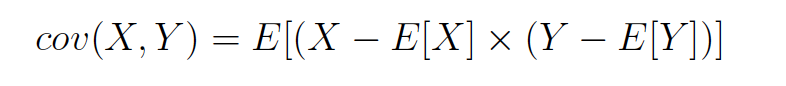

- The sign of the covariance can be interpreted as whether the two variables increase together
(positive) or decrease together (negative). 
- The magnitude of the covariance is not easily
interpreted. 
- A covariance value of zero indicates that both variables are completely independent.
- NumPy does not have a function to calculate the covariance between two variables directly.
- Instead, it has a function for calculating a covariance matrix called cov() that we can use to
retrieve the covariance. 
- By default, the cov()function will calculate the unbiased or sample
covariance between the provided random variables.

In [1]:
# vector covariance
from numpy import array
from numpy import cov
# define first vector
x = array([1,2,3,4,5,6,7,8,9])
print(x)
# define second covariance
y = array([9,8,7,6,5,4,3,2,1])
print(y)
# calculate covariance
Sigma = cov(x,y)[0,1]
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-7.5


In [4]:
# covariance matrix
cov(x,y)

array([[ 7.5, -7.5],
       [-7.5,  7.5]])

## (Pearson) Correlation
- The covariance can be normalized to a score between -1 and 1 to make the magnitude
interpretable by dividing it by the standard deviation of X and Y . 
- The result is called the
correlation of the variables, 
 also called the **Pearson correlation coeddcient**
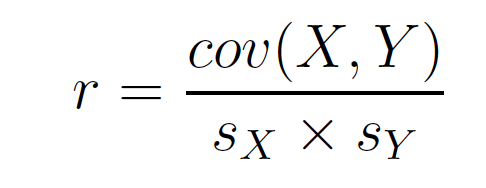

- Where r is the correlation coecient of X and Y , 
- cov(X; Y ) is the sample covariance of X
and Y and sX and sY are the standard deviations of X and Y respectively. 
- NumPy provides
the corrcoef() function

In [6]:
# vector correlation
from numpy import array
from numpy import corrcoef
# define first vector
x = array([1,2,3,4,5,6,7,8,9])
print(x)
# define second vector
y = array([9,8,7,6,5,4,3,2,1])
print(y)
# calculate correlation
corr = corrcoef(x,y)[0,1]
print(corr)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-1.0


In [8]:
# The Correlation Matrix
corrcoef(x,y)

array([[ 1., -1.],
       [-1.,  1.]])

## Covariance Matrix
- The covariance matrix is a square and symmetric matrix that describes the covariance between
two or more random variables. 
- The diagonal of the covariance matrix are the variances of each
of the random variables, as such it is often called the variance-covariance matrix

- The covariance matrix can be calculated in NumPy using the cov() function. By default,
this function will calculate the sample covariance matrix. 
- The cov() function can be called with
a single 2D array where each sub-array contains a feature (e.g. column). 
- If this function is called
with your data dened in a normal matrix format (rows then columns), 
- then a transpose of the
matrix will need to be provided to the function in order to correctly calculate the covariance of
the columns

In [12]:
X.T

array([[ 1,  3,  2,  3,  1],
       [ 5,  5,  4,  6,  5],
       [ 8, 11,  9, 10, 10]])

In [13]:
X

array([[ 1,  5,  8],
       [ 3,  5, 11],
       [ 2,  4,  9],
       [ 3,  6, 10],
       [ 1,  5, 10]])

In [14]:
# covariance matrix
from numpy import array
from numpy import cov
# define matrix of observations
X = array([
[1, 5, 8],
[3, 5, 11],
[2, 4, 9],
[3, 6, 10],
[1, 5, 10]])
print(X)
# calculate covariance matrix
Sigma = cov(X)
print(Sigma)

[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]
[[12.33333333 13.66666667 12.         12.16666667 15.66666667]
 [13.66666667 17.33333333 15.         14.33333333 18.33333333]
 [12.         15.         13.         12.5        16.        ]
 [12.16666667 14.33333333 12.5        12.33333333 15.83333333]
 [15.66666667 18.33333333 16.         15.83333333 20.33333333]]


# Principal Component Analysis
- PCA for short, is a method for reducing the dimensionality
of data. 
- It can be thought of as a projection method where data with m-columns (features) is
projected into a subspace with m or fewer columns, whilst retaining the essence of the original
data. 
- The PCA method can be described and implemented using the tools of linear algebra

## Step by Step 
- PCA is an operation applied to a dataset, represented by an n * m matrix A that results in a
projection of A which we will call B. 
- Let's walk through the steps of this operation
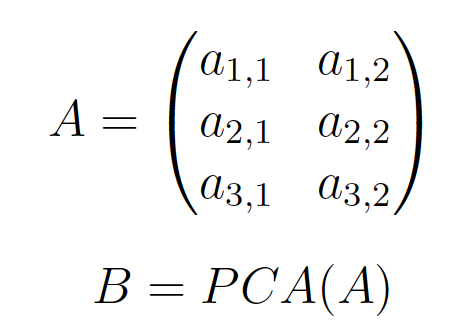

### The first step is to calculate the mean values of each column
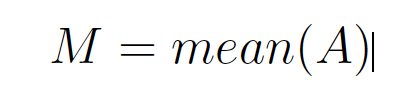

In [16]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
print M

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]


### Next, we need to center the values in each column by subtracting the mean column value
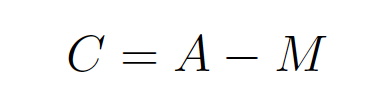

In [18]:
# center columns by subtracting column means
C = A - M
print C

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


### The next step is to calculate the covariance matrix of the centered matrix C
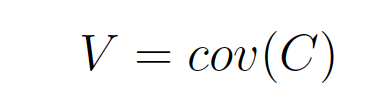

In [19]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print C.T
print V

[[-2.  0.  2.]
 [-2.  0.  2.]]
[[4. 4.]
 [4. 4.]]


### Finally, we calculate the eigendecomposition of the covariance matrix V . This results in a list of eigenvalues and a list of eigenvectors
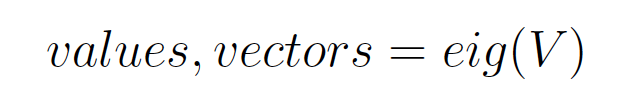

In [20]:
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


### The eigenvectors represent the directions or components for the reduced subspace of B,
### whereas the eigenvalues represent the magnitudes for the directions. 
### The eigenvectors can besorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for A. 
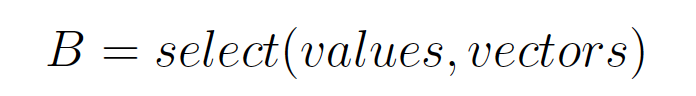


In [23]:
# project data
P = vectors.T.dot(C.T)
print P
print(P.T)

[[-2.82842712  0.          2.82842712]
 [ 0.          0.          0.        ]]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


- If all eigenvalues have a similar value, then we know that the existing
representation may already be reasonably compressed or dense and that the projection may
offer little. 
- If there are eigenvalues close to zero, they represent components or axes of B that
may be discarded. 
- A total of m or less components must be selected to comprise the chosen
subspace. 
### Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues

# PCA in SckitLearn
- The class is first fit on a dataset by calling the fit()
function, 
- and then the original dataset or other data can be projected into a subspace with the
chosen number of dimensions by calling the transform() function. 
- Once fit, the singular values
and principal components can be accessed on the PCA class via the explained variance and
components attribute

In [25]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)


[[1 2]
 [3 4]
 [5 6]]


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]


In [27]:
# transform data
B = pca.transform(A)
print(B)

[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


# Linear Regression
- Linear regression is a method for modeling the relationship between two scalar values: 
- the
input variable x and the output variable y. 
- The model assumes that y is a linear function or a
weighted sum of the input variable
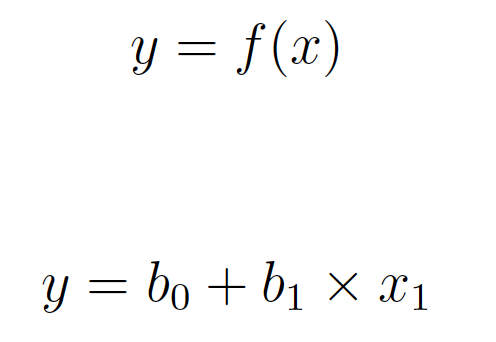

# Matrix Formulation of Linear Regression
- Linear regression can be stated using Matrix notation; for example
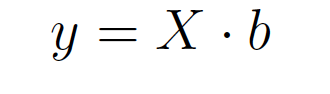

- Where X is the input data and each column is a data feature, 
- b is a vector of coeffcients
- y is a vector of output variables for each row in X
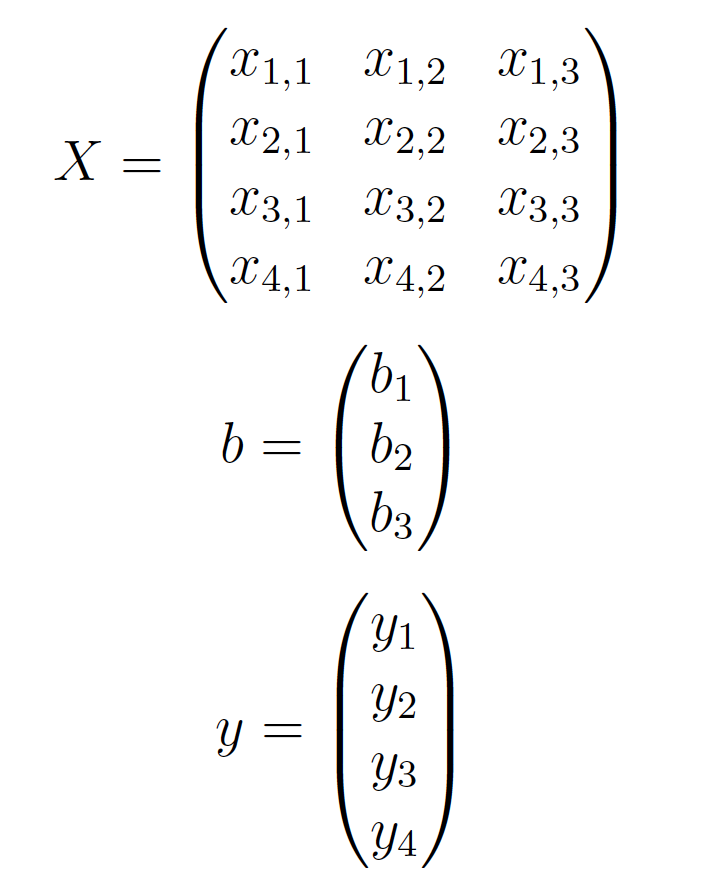

# Predictive is Linear Algebra finding minimal error
- Reformulated, the problem becomes a system of linear equations where the b vector values
are unknown. 
- This type of system is referred to as overdetermined because there are more
equations than there are unknowns, i.e. each coefficient is used on each row of data. 
- It is a challenging problem to solve analytically because there are multiple inconsistent solutions, 
- e.g.
multiple possible values for the coefficients. 
- Further, all solutions will have some error because
- there is no line that will pass nearly through all points, 
- therefore the approach to solving the
equations must be able to handle that. 
- The way this is typically achieved is by finding a solution
where the values for b in the model minimize the squared error. 
- This is called linear least
squares
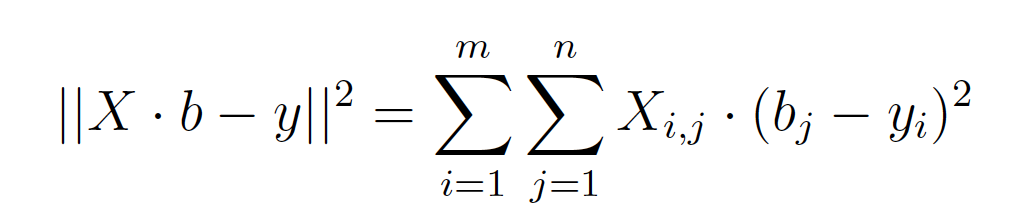

### Coding the Matrix by Philip N.Klein
#### If the euqation Ax = b has a solution:

$$Ax = b$$

- Add Inverse on both sides

$$A^{-1} Ax = A^{-1} b$$

- Since $A^{-1}A$ is the identity matrix, we get:

$$x = A^{-1}b$$




###  In matrix notation, this problem is formulated using the so-named normal equation:
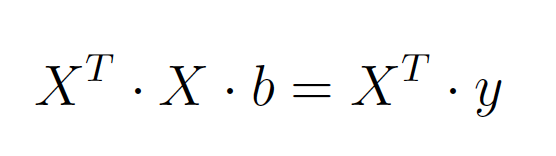

### This can be re-arranged in order to specify the solution for b as:
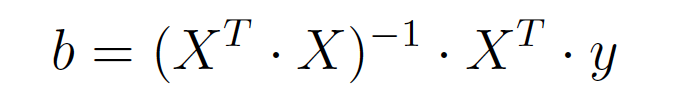

# Examplify above example via Inverse

In [28]:
# linear regression dataset
from numpy import array
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
print(data)


[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


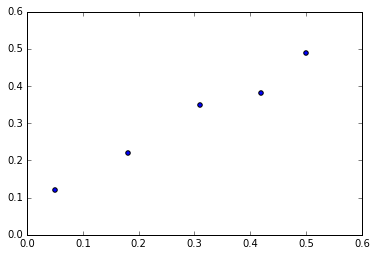

In [29]:
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# scatter plot
pyplot.scatter(X, y)
pyplot.show()

# Solve via Inverse
### b = inv(X.T.dot(X)).dot(X.T).dot(y)

[1.00233226]


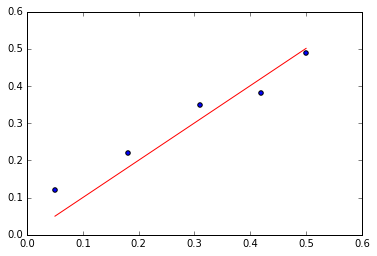

In [31]:
from numpy.linalg import inv
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

## Problem
- A problem with this approach is the matrix inverse that is both computationally expensive
and numerically unstable. 
- An alternative approach is to use a matrix decomposition to avoid
this operation

# Solve via QR Decomposition
### b = inv(R).dot(Q.T).dot(y)
- The QR decomposition is an approach of breaking a matrix down into its constituent elements.

$$A = Q R$$

- Stepping over all of the derivation, the coefficients can be found using the Q and R elements as follows:

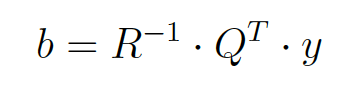

[1.00233226]


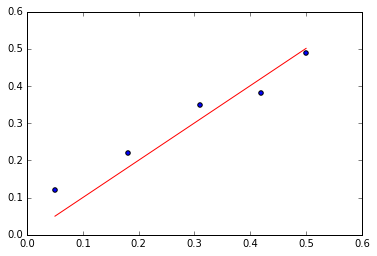

In [35]:
from numpy.linalg import qr
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# Solve via SVD and PseudoUniverse
## SVD 
- The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like
the QR decomposition.


$$X = U  \sum  V^{T}$$

- Unlike the QR decomposition, all matrices have a singular-value
decomposition. 
- As a basis for solving the system of linear equations for linear regression, 
- SVD
is more stable and the preferred approach

## Pseudouniverse 

- Once decomposed, the coefficients can be found by
calculating the pseudoinverse of the input matrix X
- multiplying that by the output vector
y

$$ b = X^{+} y $$

- Where the pseudoinverse X+ is calculated as following

$$ X^{+} = U  D^{+}  V^{T}$$

- Where X+ is the pseudoinverse of X and the + is a superscript, 
- D+ is the pseudoinverse of
the diagonal matrix $\sum$ 
- V T is the transpose of V .
- NumPy provides the function pinv() to
calculate the pseudoinverse directly

[1.00233226]


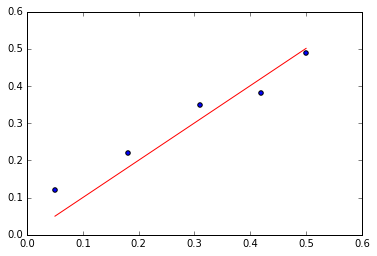

In [36]:
from numpy.linalg import pinv
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# Solve via lstsq() Function
- The pseudoinverse via SVD approach to solving linear least squares is the de facto standard.
- This is because it is stable and works with most datasets. 
- NumPy provides a convenience
function named lstsq() that solves the linear least squares function using the SVD approach.
- The function takes as input the X matrix and y vector and returns the b coefficients as well as
- residual errors, the rank of the provided X matrix and the singular values

[1.00233226]


/usr/local/src/bluemix_jupyter_bundle.v79/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


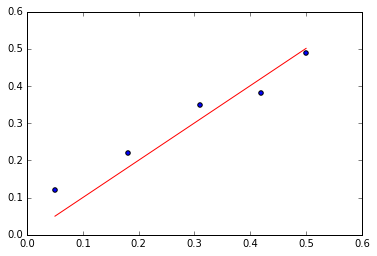

In [37]:
from numpy.linalg import lstsq
# calculate coefficients
b, residuals, rank, s = lstsq(X, y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

In [38]:
print residuals

[0.00979697]


In [39]:
print rank

1


In [40]:
print s

[0.74659226]
